# House Rent Prediction: Exploratory Data Analysis (EDA) and ML Models

## About Dataset:

In this Dataset, we have information on almost 4700+ Houses/Apartments/Flats Available for Rent with different parameters like BHK, Rent, Size, No. of Floors, Area Type, Area Locality, City, Furnishing Status, Type of Tenant Preferred, No. of Bathrooms, Point of Contact.

## Dataset Glossary:

- **BHK**: Number of Bedrooms, Hall, Kitchen.

- **Rent**: Rent of the Houses/Apartments/Flats.

- **Size**: Size of the Houses/Apartments/Flats in Square Feet.

- **Floor**: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)

- **Area Type**: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.

- **Area Locality**: Locality of the Houses/Apartments/Flats.

- **City**: City where the Houses/Apartments/Flats are Located.

- **Furnishing Status**: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

- **Tenant Preferred**: Type of Tenant Preferred by the Owner or Agent.

- **Bathroom**: Number of Bathrooms.

- **Point of Contact**: Whom should you contact for more information regarding the Houses/Apartments/Flats.

## Importing Libraries:

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-rent-prediction-dataset/Dataset Glossary.txt
/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv


## Loading the Data:

In [30]:
df = pd.read_csv('/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv')

# first five rows
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


#### Checking for Missing Values:

In [5]:
df.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

## Summary Statistics:

In [6]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


## Data Analysis and Visualization:

<function matplotlib.pyplot.show(close=None, block=None)>

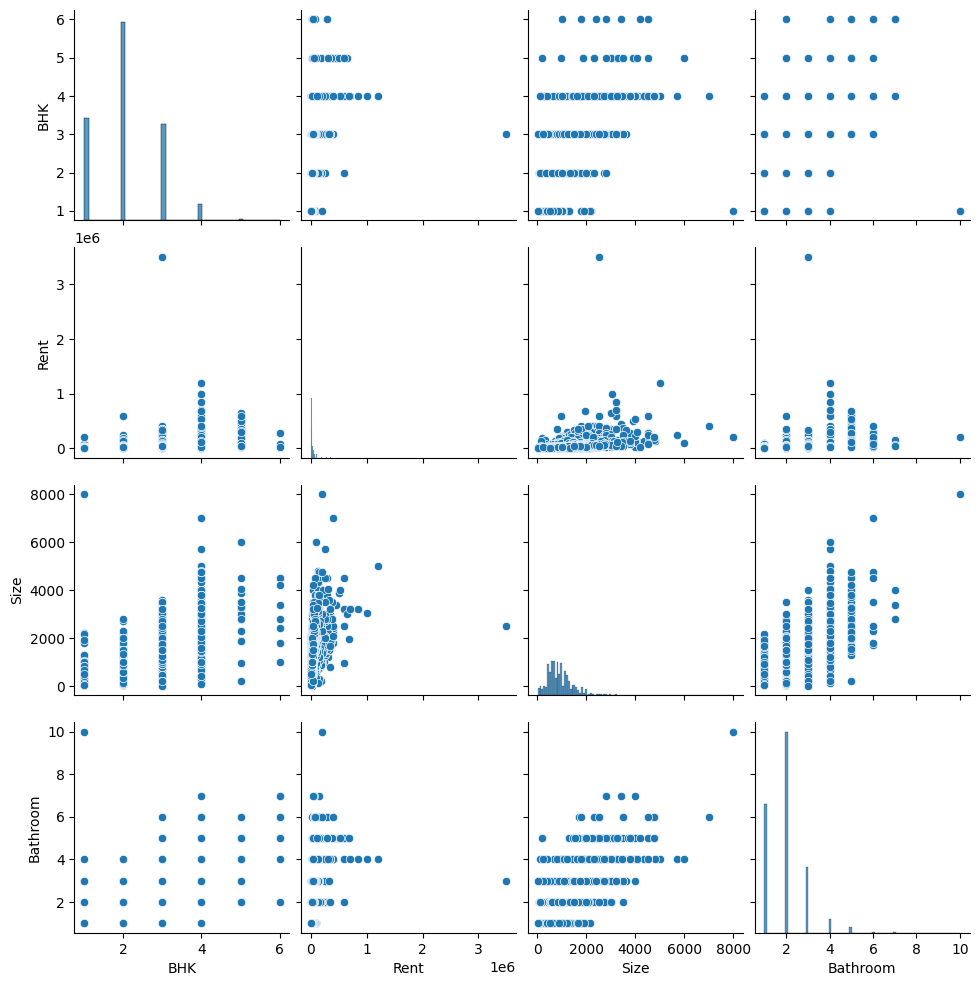

In [7]:
# pairplot
sns.pairplot(df, height=2.5)
plt.show

## Bivariate Analysis:

#### For House Rent & House Size (in Sq Ft):

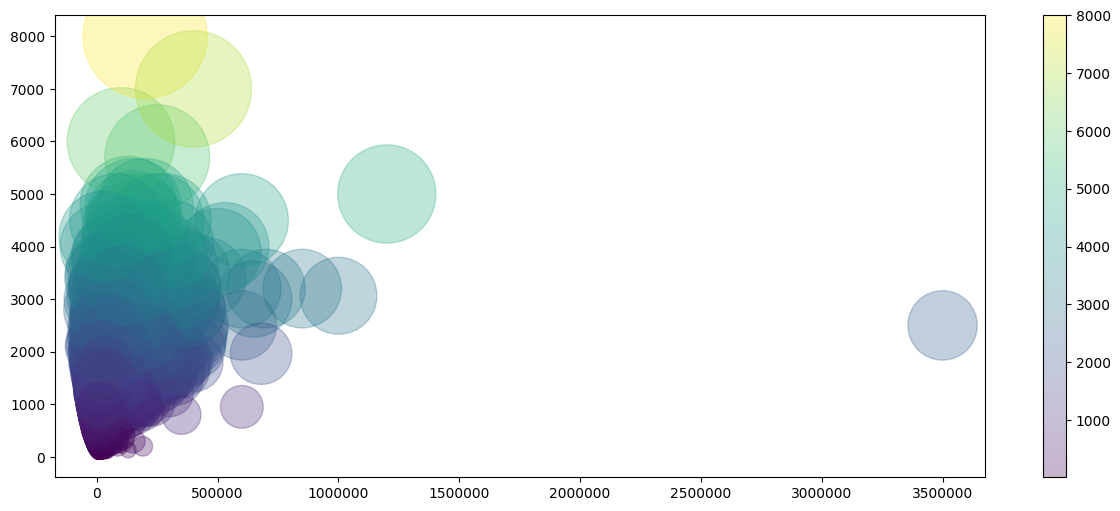

In [8]:
# relationship between house rent and house size

plt.figure(figsize=(15,6))
colors = df["Size"]
sizes = df["Size"]
plt.ticklabel_format(style = 'plain')
plt.scatter(df['Rent'], df['Size'], c = colors, s = sizes, alpha = 0.3, cmap = 'viridis')
plt.colorbar()

## Univariate Analysis:

#### For BHK (No. of Bathrooms, Hall and Kitchen):

In [9]:
df['BHK'].value_counts()

BHK
2    2265
1    1167
3    1098
4     189
5      19
6       8
Name: count, dtype: int64

In [10]:
fig = px.pie(df, names='BHK', height=700,
             width= 700, color_discrete_sequence=px.colors.sequential.deep,
             title='Pie Chart of BHKs present in Houses available for Rent')
fig.update_traces(textfont_size=15)
fig.show()

- Mostly 2 BHK house are rented the most, as it is mostly under budget for the people and can be rented soon.
- 5 and 6 BHK house are put less for rent, because there is very less demand for such big spacious houses in India.

#### For Bathroom:

In [11]:
fig = px.pie(df, names='Bathroom', height=700,
             width= 700, color_discrete_sequence=px.colors.sequential.deep,
             title='Pie Chart for different number of Bathrooms present in Houses available for Rent')
fig.update_traces(textfont_size=15)
fig.show()

- House with 2 Bathrooms are most common for the houses put up on rent.
- Houses with 7 and 10 bathroom quite seems inappropriate and not much of use.

#### For City:

In [12]:
# houses available for rent in different cities
fig = px.pie(df, names='City', height=700, width= 700,
             color_discrete_sequence= px.colors.sequential.Plasma_r,
             title='Pie Chart for Houses available for Rent in different cities')
fig.update_traces(textfont_size=15)
fig.show()

- Mumbai, followed by Chennai and Hyderad has most number of rented houses, seems like there is very high demand considering the job corporates and other factors.

In [31]:
# dropping unnecessary columns from dataset
df = df.drop(['Posted On','Area Locality','Floor'],axis=1)
df.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [32]:
df = pd.get_dummies(df, columns=['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'], dtype=int)
df.head()

,BHK,Rent,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,2,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,2,20000,800,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,2,17000,1000,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,2,10000,800,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,2,7500,850,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


## Modelling:

In [33]:
X = df.drop('Rent',axis=1)
y = df['Rent']

In [34]:
X

,BHK,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,1100,2,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,2,800,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,2,1000,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,2,800,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,2,850,1,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,1000,2,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
4742,3,2000,3,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
4743,3,1750,3,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
4744,3,1500,2,0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0


In [35]:
y

0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4746, dtype: int64

#### Splitting into Train and Test Dataset:

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

#### Scaling the data:

In [37]:
# scaling the data
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [38]:
print(X_train,y_train)

[[ 1.07242196  0.99751713  0.03208951 ...  1.4467584  -0.01735264
  -1.44576366]
 [-0.11392028 -0.36341383  0.03208951 ...  1.4467584  -0.01735264
  -1.44576366]
 [-1.30026253 -1.05017992 -1.09002997 ... -0.69120041 -0.01735264
   0.69167598]
 ...
 [-0.11392028 -0.26260413  0.03208951 ...  1.4467584  -0.01735264
  -1.44576366]
 [ 1.07242196  3.99030514  1.15420899 ...  1.4467584  -0.01735264
  -1.44576366]
 [-1.30026253 -0.81390719  0.03208951 ...  1.4467584  -0.01735264
  -1.44576366]] [[ 0.34978649]
 [ 0.47937846]
 [-0.34529773]
 ...
 [-0.18036249]
 [ 0.58540826]
 [-0.12145705]]


#### Linear Regression:

In [39]:
lm = LinearRegression()
lm.fit(X_train,y_train)
lm_pred = lm.predict(X_test)

# evaluation metrics
mae_lm = metrics.mean_absolute_error(y_test, lm_pred)
mse_lm =  metrics.mean_squared_error(y_test, lm_pred)
rmse_lm =  np.sqrt(mse_lm)

In [40]:
print('MAE:', mae_lm)
print('MSE:', mse_lm)
print('RMSE:', rmse_lm)

MAE: 212910690021.7522
MSE: 1.0683759914418587e+23
RMSE: 326860213461.63544


#### Decision Tree:

In [41]:
dt = DecisionTreeRegressor(random_state = 100)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# evaluation metrics
mae_dt = metrics.mean_absolute_error(y_test, dt_pred)
mse_dt =  metrics.mean_squared_error(y_test, dt_pred)
rmse_dt =  np.sqrt(mse_dt)

In [42]:
print('MAE:', mae_dt)
print('MSE:', mse_dt)
print('RMSE:', rmse_dt)

MAE: 0.2899649387929153
MSE: 1.4763002802221508
RMSE: 1.2150309791203477


#### Support Vector Regressor:

In [45]:
svr = SVR()
svr.fit(X_train, y_train) 
svr_pred = svr.predict(X_test)

# evaluation metrics
mae_svr = metrics.mean_absolute_error(y_test, svr_pred)
mse_svr =  metrics.mean_squared_error(y_test, svr_pred)
rmse_svr =  np.sqrt(mse_svr)

In [46]:
print('MAE:', mae_svr)
print('MSE:', mse_svr)
print('RMSE:', rmse_svr)

MAE: 0.24660959277808753
MSE: 0.4098729153596837
RMSE: 0.6402131796204165


#### Random Forest:

In [47]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# evaluation metrics
mae_rf = metrics.mean_absolute_error(y_test, rf_pred)
mse_rf =  metrics.mean_squared_error(y_test, rf_pred)
rmse_rf =  np.sqrt(mse_rf)

In [48]:
print('MAE:', mae_rf)
print('MSE:', mse_rf)
print('RMSE:', rmse_rf)

MAE: 0.27331544974444943
MSE: 0.9115839457229533
RMSE: 0.9547690536056106


#### Lasso Regression:

In [49]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)

clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

# Evaluation metrics
mae_clf = metrics.mean_absolute_error(y_test, clf_pred)
mse_clf =  metrics.mean_squared_error(y_test, clf_pred)
rmse_clf =  np.sqrt(mse_clf)

print('MAE:', mae_clf)
print('MSE:', mse_clf)
print('RMSE:', rmse_clf)

MAE: 0.32349584233437806
MSE: 0.6032821011984412
RMSE: 0.7767123670950793
